# Normalizayon
İstatistiksel normalleştirme, özellikle, veri madenciliği (data mining) gibi bilgisayar bilimlerinin istatistiksel veri işleme alanlarında kullanılan bir yöntemdir. Yöntemin amacı, veriler arasında farklılığın çok fazla olduğu durumlarda verileri tek bir düzen içerisinde ele almaktır.
Diğer bir kullanılışı ise farklı ölçekleme sisteminde bulunan verilerin birbiri ile karşılaştırılabilmesidir. Buradaki amaç, matematiksel fonksiyonlar kullanarak, farklı sistemlerde bulunan verileri, ortak bir sisteme taşımak ve karşılaştırılabilir hale getirmektir.
1. Asgari – Azami Normalleştirmesi (Min-Max Normalisation):
Bu yöntemde, bir grup verinin içerisindeki en büyük ve en küçük değerler ele alınır. Diğer bütün veriler, bu değerlere göre normalleştirilir. Buradaki amaç en küçük değeri 0 ve en büyük değeri 1 olacak şekilde normalleştirmek ve diğer bütün verileri bu 0-1 aralığına yaymaktır.
2. Standart Skor (Standard Score):
Diğer bir normalleştirme yöntemidir. Bir önceki yöntemde, sayılar en yüksek ve en düşük değerlere göre normalleştirilmişti. Bu yöntemde ise ortalama değer (mean value) ve standart sapma (standard deviation) değerleri göz önüne alınır.  Sistemde kullanılan standart sapmaya atfen, standart skor (standard score) olarak da isimlendirilir. Oldukça popüler normalleştirme yöntemlerinden birisidir.

**Normalizasyon yöntemleri**
1. Standart Skorlama (Standard Score) : Bir popülasyondaki parametrelerin bilinmesi durumunda hata değerlerini normalleştirmek için kullanılır. Normal dağılımı esas alır ve bu dağılıma uyan popülasyonlarda başarılı çalışır. Basitçe her değerin ortalamadan olan uzaklıklarının standart sapmaya oranı ile bulunur.
2. Student’s t test(Öğrencinin t testi): popülasyonun parametrelerinin bilinmediği durumlarda kullanılan ve dolayısıyla bir beklendik değerle hesaplanan ve bu beklendik değerle veriler arasındaki farkı / hatayı (tortu, residual) bularak bu değere göre normalleştiren yöntemdir. Her değerin beklendik değere olan uzaklığı ve beklendik değerlerin farklarının ortalamasına oranı ile bulunur.
3. Standartlaştırılmış an (Standardized moment): Genelde standart moment olarak Türkçede geçen yöntem, aslında momentlerin standartlaştırılması için k. momentin standart sapmaya oranı ile bulunur.
4. Varyans çarpanı (coefficient of variance): Bir popülasyondaki farklılıkları göstermek için kullanılan çarpandır. Basitçe bir popülasyonun ortalama değerinin standart sapmasına oranı olarak hesaplanır.
5. Özellik ölçeklemesi (Feature Scaling) veya Min-Max Normalleştirmesi : Bir popülasyondaki en yüksek ve en düşük değere görece olarak her değerin konumunu hesaplamak için kullanılır.

# Proje Açıklaması - Özet Bilgiler
Bu proje [LendingClub.com](https://www.kaggle.com/braindeadcoder/lending-club-data) alınan veri seti kullanılmıştır. Lending club, paraya ihtiyacı olan insanlar (borç alanlar, borrowers) ile borç veren insanları (yatırımcılar, investors) bir araya getirir. Bu projede yatırımcıların para verdiği insanların borcunu ödeme olasılığı ele alınmıştır. Bu proje ile yatırımcılar borç verecekleri insanları makine öğrenmesi yardımıyla daha güvenilir insanlardan seçebilir.
Bu projede 2007-2010 yılları arasında veriler yardımıyla borç alacak olan insanların borçlarını tamamen ödeyip ödemeyecekleri sınıflandırma yöntemi ile tahminlenecektir.

In [1]:
# Gerekli kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv("../input/lending-club-data/loan_data.csv")

# Veri seti sütünlarının (niteliklerinin) açıklaması:
* **credit.policy:** Müşteri eğer Lending Club kredi politikasını kabul etmiş ise 1, etmemiş ise 0 değerindedir.
* **purpose:** Borç alınacak paranın ne için kullanılacağıdır. ("credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other")
* **int.rate:** Borcun faiz oranıdır. (Örneğin %11, 0.11 olarak değerlendirilir.) (Ayrıca borç ödemesi riskli kişilere daha fazla faiz atanır.)
* **installment:** Borçlunun ödediği aylık taksit miktarıdır.
* **log.annual.inc:** Borçlunun yıllık geliridir.
* **dti:** Borçlunun borç/gelir oranıdır. (Borç tutarının yıllık gelire bölünmesi ile bulunur).
* **fico:** Borçlunun FICO kredi skorudur.
* **days.with.cr.line:** Borçlunun kredi limitinde olduğu gün sayısıdır.
* **revol.bal:** Borçlunun kredi kartı faturasında ödememiş olduğu tutardır.
* **revol.util:** Borçlunun toplam kredisinde kullandığı tutardır.
* **inq.last.6mths:** Borçlunun son 6 ay içinde alacaklıları tarafından yapılan soruşturma sayısı.
* **delinq.2yrs:** Borçlunun 2 yıl içerisindeki kaç borcunun ödeme tarihi gelse bile 30 gün içerisinde ödemediğinin göstergesidir.
* **pub.rec:** Borçlunun kamusal kayıtlarının sayısı. (İflas davaları, hacizleri, ...)

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# Özet
print("Toplam sütun sayısı (veri öznitelik sayısı):", len(loans.columns))
print("Toplam satır sayısı (veri sayısı):", len(loans.index))
print("Toplam sınıf sayısı: 2 (Borç alanlarının içinden borcunun ödeyenler ve ödemeyenler (1, 0))")

Toplam sütun sayısı (veri öznitelik sayısı): 14
Toplam satır sayısı (veri sayısı): 9578
Toplam sınıf sayısı: 2 (Borç alanlarının içinden borcunun ödeyenler ve ödemeyenler (1, 0))


# Veri Analizi

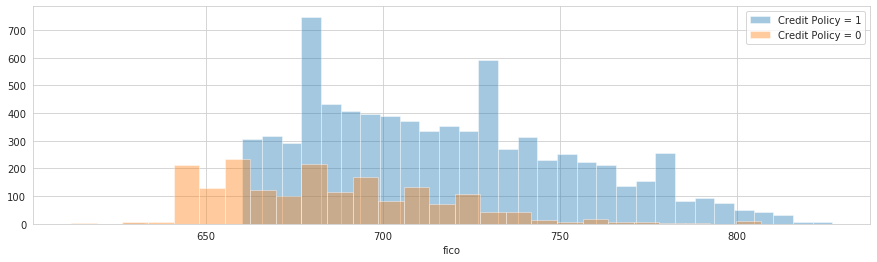

In [7]:
# Kredi politikasının kabul edenler ile etmeyenlerin oldukça faydalı bir veri alan FICO skoruna göre grafiği:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,4))
sns.distplot(loans[loans["credit.policy"] == 1]["fico"], kde=False, label="Credit Policy = 1")
sns.distplot(loans[loans["credit.policy"] == 0]["fico"], kde=False, label="Credit Policy = 0")
plt.legend(loc=0)
# Görüldüğü üzere kredi politikasını kabul edenlerin FICO skoru daha yüksek.

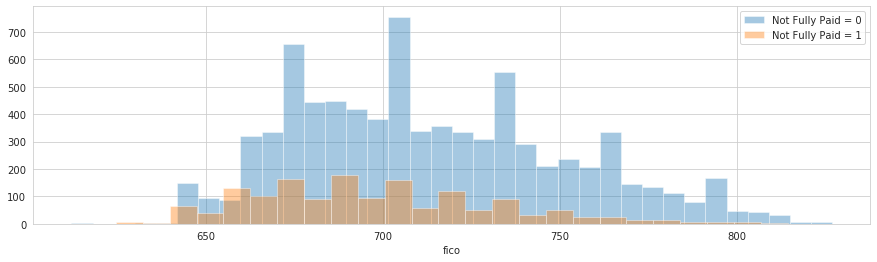

In [8]:
# Aynı şekilde çok yararlı FICO bilgisine kullanarak borcunun tamamen ödemeyenlerin FICO değerlerin grafiği:
fig = plt.figure(figsize=(15,4))
sns.distplot(loans[loans["not.fully.paid"] == 0]["fico"], kde=False, label="Not Fully Paid = 0")
sns.distplot(loans[loans["not.fully.paid"] == 1]["fico"], kde=False, label="Not Fully Paid = 1")
plt.legend(loc=0)
# Görüldüğü üzere borcunun tamamen ödemeyenleri FICO değeri daha düşük.

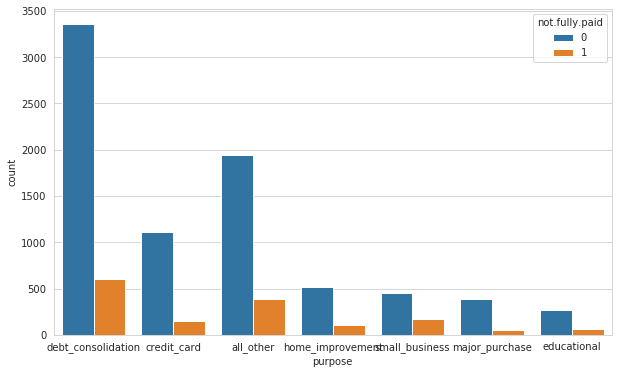

In [9]:
# Borç amaçlarına göre krediyi tamamen ödeme grafiği:
# Hangi amaçla borç alanlar borcunu ödüyor?
fig = plt.figure(figsize=(10,6))
sns.countplot(x="purpose", data=loans, hue="not.fully.paid")

In [10]:
# Bu bir doğal dil işleme problemi olmadığı için metin değerilerini kategori edilebilecek sayısal değerlere dönüştürme:
final_data = pd.get_dummies(loans, columns=["purpose"], drop_first=True)
final_data.head()
# Tamamen sayılardan oluşan bir veri seti elde ettik.

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


* Verimizi daha önce de denildiği üzere borçunu ödeyecek ve ödemeyecek kişiler olarak sınıflandıracağız.
* Bunun için ilk önce Decision Tree sonra Rain Forest yönteminden yararlanacağız.
* Bunun için ise öncelikle hangi özelliği tahminleyeceğimiz 'y' değişkenine atayacağız.
* 'y' özelliğini tahminlemek için kullanılacak veri setindeki diğer sütunları ise 'X' değişkenine atayacağız.
* Daha sonra ise bu değişkenleri eğitim ve test (train/test) verisi haline getirmek için böleceğiz.
* Ondan sonra Decision Tree ve Rain Forest yöntemiyle tahminleme yapacağız.

# Decision Tree

In [11]:
X = final_data.drop("not.fully.paid", axis=1)
y = final_data["not.fully.paid"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
# Veri setini eğitme işlemi:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# Tahminleme işlemi:
predictions = dtree.predict(X_test)

In [15]:
# Tahminleri kontrol etme işlemi:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2055  359]
 [ 365   95]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2414
           1       0.21      0.21      0.21       460

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.75      0.75      2874



In [16]:
# Diğer bir test etme işlemi (10 fold cross validation):
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtree, X, y, cv=10))

[0.72755741 0.75156576 0.75365344 0.76304802 0.75887265 0.75156576
 0.73590814 0.73799582 0.57680251 0.52664577]


In [17]:
# 100. sıradaki kişinin özellikleri
final_data.drop("not.fully.paid", axis=1).iloc[100]

credit.policy                    1.00000
int.rate                         0.07120
installment                     61.87000
log.annual.inc                  11.67844
dti                              0.43000
fico                           772.00000
days.with.cr.line             5936.00000
revol.bal                     4709.00000
revol.util                      18.50000
inq.last.6mths                   0.00000
delinq.2yrs                      0.00000
pub.rec                          0.00000
purpose_credit_card              0.00000
purpose_debt_consolidation       1.00000
purpose_educational              0.00000
purpose_home_improvement         0.00000
purpose_major_purchase           0.00000
purpose_small_business           0.00000
Name: 100, dtype: float64

In [18]:
# 100. sıradaki kişinin borcunu ödeyip ödemeyeceğini Decision Tree ile tahminleme işlemi:
dtree.predict([final_data.drop("not.fully.paid", axis=1).iloc[100]])
# Tahminlemeye göre kişi borcunu ödemeyecek.

array([0])

In [19]:
# Gerçek sonuca göre 100. kişi borcunu ödemiyor.
final_data["not.fully.paid"].iloc[100]

0

In [20]:
# Decision Tree ile yapılan sonuçlar başarılı, şimdi Random Forest ile tahminleme yapalım.

# Rain Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
# Veri setini eğitme işlemi:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# Tahminleme işlemi:
rfc_predictions = rfc.predict(X_test)

In [23]:
# Tahminleri kontrol etme işlemi:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[2055  359]
 [ 365   95]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2414
           1       0.21      0.21      0.21       460

    accuracy                           0.75      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.75      0.75      2874



In [24]:
# Diğer bir test etme işlemi (10 fold cross validation):
print(cross_val_score(rfc, X, y, cv=10))

[0.84029228 0.84029228 0.84029228 0.84029228 0.83924843 0.83716075
 0.83611691 0.83924843 0.64576803 0.58202717]


In [25]:
# 100. sıradaki kişinin özellikleri
final_data.drop("not.fully.paid", axis=1).iloc[100]

credit.policy                    1.00000
int.rate                         0.07120
installment                     61.87000
log.annual.inc                  11.67844
dti                              0.43000
fico                           772.00000
days.with.cr.line             5936.00000
revol.bal                     4709.00000
revol.util                      18.50000
inq.last.6mths                   0.00000
delinq.2yrs                      0.00000
pub.rec                          0.00000
purpose_credit_card              0.00000
purpose_debt_consolidation       1.00000
purpose_educational              0.00000
purpose_home_improvement         0.00000
purpose_major_purchase           0.00000
purpose_small_business           0.00000
Name: 100, dtype: float64

In [26]:
# 100. sıradaki kişinin borcunu ödeyip ödemeyeceğini Random Forest ile tahminleme işlemi:
rfc.predict([final_data.drop("not.fully.paid", axis=1).iloc[100]])
# Tahminlemeye göre kişi borcunu ödemeyecek.

array([0])

In [27]:
# Gerçek sonuca göre 100. kişi borcunu ödemiyor.
final_data["not.fully.paid"].iloc[100]

0

In [28]:
# Rain Forest ile yapılan sonuçlar da başarılı.